<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Predicting House Prices — End-to-End
1. Problem Statement
Predict house price based on features like square footage, number of bedrooms, number of bathrooms, and location.

In [ ]:
import numpy as np

# X: House sizes, y: Prices
X = np.array([[1000], [1500], [2000], [2300], [3000]])
y = np.array([200, 330, 400, 420, 600])

# Add intercept (bias) column
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (n_samples, n_features+1)

# Closed-form solution
w_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Closed-form weights:", w_closed)

# Prediction and metrics
y_pred = X_b.dot(w_closed)
mse = np.mean((y_pred - y) ** 2)
print("Predictions:", y_pred)
print("MSE:", mse)


Closed-form weights: [21.02915952  0.18825043]
Predictions: [209.27958834 303.40480274 397.53001715 454.0051458  585.78044597]
MSE: 431.61234991423606


gradient descent from sratch


In [ ]:
# Using same X_b, y as above
w_gd = np.zeros(X_b.shape[1])  # Initialize weights to zero
lr = 1e-7
epochs = 1000

for epoch in range(epochs):
    y_pred = X_b.dot(w_gd)
    error = y_pred - y
    grad = 2 / X_b.shape[0] * X_b.T.dot(error)
    w_gd -= lr * grad
    if epoch % 200 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}, MSE: {mse:.4f}")

print("GD weights:", w_gd)
print("Predictions:", X_b.dot(w_gd))

Epoch 0, MSE: 169060.0000
Epoch 200, MSE: 479.4885
Epoch 400, MSE: 479.4881
Epoch 600, MSE: 479.4877
Epoch 800, MSE: 479.4873
GD weights: [0.00054533 0.19781777]
Predictions: [197.81831046 296.72719303 395.63607559 454.98140513 593.45384073]


Step 1: Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data     # Features
y = housing.target   # Target

# Preview shape and columns
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature columns:", X.columns.tolist())

Features shape: (20640, 8)
Target shape: (20640,)
Feature columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Show top rows
print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
print("Missing values:\n", X.isnull().sum())

Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [ ]:
print("Stats:\n", X.describe())

Stats:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930

In [ ]:
print("Target stats:\n", y.describe())

Target stats:
 count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


Step 2a: Feature Scaling Z-score (Standardization)
Scales each feature to mean 0, std 1.

Prevents large-valued features from dominating in regression.

In [ ]:
# Standardize features: zero mean, unit variance
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

print("Scaled data stats:\n", X_scaled.describe())

Scaled data stats:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   4.406467e-17  1.101617e-17  6.885104e-17 -1.018995e-16 -1.514723e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.774256e+00 -2.196127e+00 -1.852274e+00 -1.610729e+00 -1.256092e+00   
25%   -6.881019e-01 -8.453727e-01 -3.994399e-01 -1.911670e-01 -5.637952e-01   
50%   -1.767908e-01  2.864502e-02 -8.078293e-02 -1.010626e-01 -2.291262e-01   
75%    4.592952e-01  6.642943e-01  2.519554e-01  6.015724e-03  2.644885e-01   
max    5.858144e+00  1.856137e+00  5.516190e+01  6.957003e+01  3.024960e+01   

           AveOccup      Latitude     Longitude  
count  2.064000e+04  2.064000e+04  2.064000e+04  
mean   2.754042e-18 -1.035520e-15 -8.526513e-15  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.289944e-01 -1.447533e+00 -2.385935e+00  
25%   -6.170912e-0

One-hot Encoding (Categorical, From Scratch)

Not needed for California housing, but for future:

python

def one_hot_encode(column):
    categories = np.unique(column)
    return np.array([column == cat for cat in categories]).astype(int).T

Step 2b: Train/Test Split

Use random_state for reproducible splits.

Always fit your model ONLY on train, evaluate on test.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (16512, 8)
Test set shape: (4128, 8)


Step 3: Linear Regression From Scratch (Closed-form)

In [ ]:
# Add bias column (intercept) to both train and test
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Closed-form solution using Normal Equation
w_closed = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Predictions
y_train_pred = X_train_b.dot(w_closed)
y_test_pred = X_test_b.dot(w_closed)

# Metrics
def regression_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_train, mse_train, rmse_train = regression_metrics(y_train, y_train_pred)
mae_test, mse_test, rmse_test = regression_metrics(y_test, y_test_pred)

print("Weights:", w_closed)
print(f"Train: MAE={mae_train:.3f}, MSE={mse_train:.3f}, RMSE={rmse_train:.3f}")
print(f"Test:  MAE={mae_test:.3f}, MSE={mse_test:.3f}, RMSE={rmse_test:.3f}")


Weights: [ 2.06786231  0.85240234  0.1223852  -0.3051233   0.37114087 -0.00229847
 -0.03662452 -0.89665677 -0.86894787]
Train: MAE=0.529, MSE=0.518, RMSE=0.720
Test:  MAE=0.533, MSE=0.556, RMSE=0.746


Step: Linear Regression Using Gradient Descent (Scratch, Multivariate)

In [ ]:
# Using X_train_b, X_test_b from previous step
n_features = X_train_b.shape[1]
w_gd = np.zeros(n_features)       # Init weights to zero
lr = 0.01                        # Learning rate -- may need tuning
epochs = 1000                    # Number of iterations

for epoch in range(epochs):
    y_pred = X_train_b.dot(w_gd)                # Predict
    error = y_pred - y_train
    grad = 2 / X_train_b.shape[0] * X_train_b.T.dot(error)
    w_gd -= lr * grad
    if epoch % 200 == 0 or epoch == epochs-1:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}, MSE: {mse:.4f}")

# Evaluate on train and test
y_train_pred_gd = X_train_b.dot(w_gd)
y_test_pred_gd = X_test_b.dot(w_gd)

mae_train, mse_train, rmse_train = regression_metrics(y_train, y_train_pred_gd)
mae_test, mse_test, rmse_test = regression_metrics(y_test, y_test_pred_gd)

print("GD weights:", w_gd)
print(f"Train: MAE={mae_train:.3f}, MSE={mse_train:.3f}, RMSE={rmse_train:.3f}")
print(f"Test:  MAE={mae_test:.3f}, MSE={mse_test:.3f}, RMSE={rmse_test:.3f}")

Epoch 0, MSE: 5.6297
Epoch 200, MSE: 0.5952
Epoch 400, MSE: 0.5594
Epoch 600, MSE: 0.5408
Epoch 800, MSE: 0.5306
Epoch 999, MSE: 0.5250
GD weights: [ 2.06803455  0.84889637  0.15027493 -0.24395471  0.28949236  0.00716669
 -0.03881161 -0.68569718 -0.65517357]
Train: MAE=0.531, MSE=0.525, RMSE=0.725
Test:  MAE=0.536, MSE=0.554, RMSE=0.744


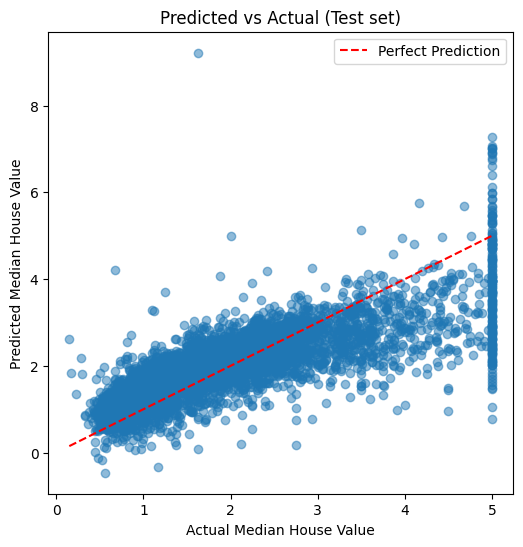

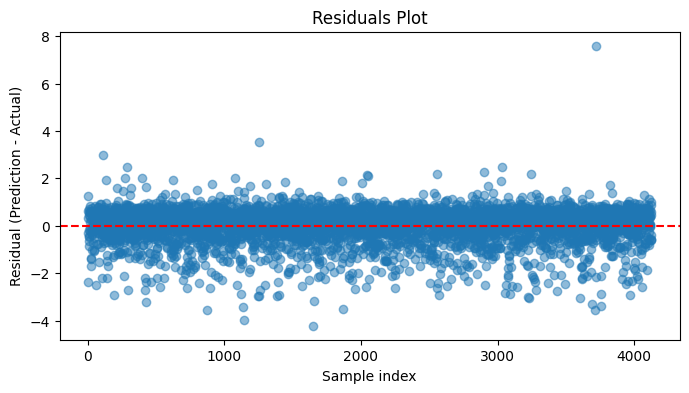

In [ ]:
import matplotlib.pyplot as plt

# Plot: Predicted vs Actual (Test Set)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_gd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual (Test set)')
plt.legend()
plt.show()

# Plot: Residuals (Predicted - Actual)
residuals = y_test_pred_gd - y_test
plt.figure(figsize=(8, 4))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Sample index')
plt.ylabel('Residual (Prediction - Actual)')
plt.title('Residuals Plot')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lib = model.predict(X_test)
mae, mse, rmse = regression_metrics(y_test, y_pred_lib)
print("Sklearn LinearRegression Test: MAE=%.3f MSE=%.3f RMSE=%.3f" % (mae, mse, rmse))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Try Ridge, Lasso, ElasticNet with varying alpha/l1_ratio
for Model, name in [
    (Ridge, 'Ridge'),
    (Lasso, 'Lasso'),
    (ElasticNet, 'ElasticNet')
]:
    model = Model(alpha=1.0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae, mse, rmse = regression_metrics(y_test, pred)
    print(f"Sklearn {name} Test: MAE={mae:.3f} MSE={mse:.3f} RMSE={rmse:.3f}")
    print("Coefficients:", model.coef_)

Sklearn LinearRegression Test: MAE=0.533 MSE=0.556 RMSE=0.746
Coefficients: [ 0.85240234  0.1223852  -0.3051233   0.37114087 -0.00229847 -0.03662452
 -0.89665677 -0.86894787]
Intercept: 2.067862309508389
Sklearn Ridge Test: MAE=0.533 MSE=0.556 RMSE=0.746
Coefficients: [ 0.85233074  0.12246301 -0.30487828  0.37082752 -0.002273   -0.03662814
 -0.89590617 -0.868186  ]
Sklearn Lasso Test: MAE=0.906 MSE=1.311 RMSE=1.145
Coefficients: [ 0.  0.  0. -0. -0. -0. -0. -0.]
Sklearn ElasticNet Test: MAE=0.805 MSE=1.043 RMSE=1.021
Coefficients: [ 0.19963082  0.          0.         -0.         -0.         -0.
 -0.         -0.        ]


For your dataset and hyperparameters, LinearRegression and Ridge are your best choices. Lasso/ElasticNet can do structured feature selection, but require tuning to avoid excessive sparsity.

 find the optimal regularization for Lasso/ElasticNet, perform hyperparameter tuning (grid search for alpha/l1_ratio).

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with cross-validation over a range of alpha values (use cv=5 for 5-fold by default)
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 30), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_cv.alpha_)
print("Lasso CV Coefficients:", lasso_cv.coef_)

# Evaluate
y_test_pred_lasso_cv = lasso_cv.predict(X_test)
mae, mse, rmse = regression_metrics(y_test, y_test_pred_lasso_cv)
print("Best Lasso Test: MAE=%.3f MSE=%.3f RMSE=%.3f" % (mae, mse, rmse))

Best alpha for Lasso: 0.001
Lasso CV Coefficients: [ 0.84679398  0.12319473 -0.29057864  0.35575923 -0.00105138 -0.03586665
 -0.8857896  -0.85739619]
Best Lasso Test: MAE=0.533 MSE=0.554 RMSE=0.745
